In [34]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
import seaborn as sns
from matplotlib.pyplot import figure

In [35]:
df1=pd.read_csv('champ_stats2.csv').drop(columns='Unnamed: 0')
df2=pd.read_csv('champs_stat.csv').drop(columns='Unnamed: 0')
df2.rename(columns = {'Champions':'Name'}, inplace = True)
df=pd.merge(df1, df2, on='Name')
df = df.replace({'%':''}, regex=True)
df['Win %'], df['Role %'], df['Ban %'],df['AS+'],df['Pick %']=df['Win %'].astype(float), df['Role %'].astype(float), df['Ban %'].astype(float),df['AS+'] .astype(float), df['Pick %'].astype(float)
dfr=df.copy()
df=pd.get_dummies(data=df, columns=['Role', 'Tier'])
df=df.fillna(0)

In [36]:
x=df.drop(columns=['Win %','Name'])
y=df['Win %']
X_train, X_validation, Y_train, Y_validation = train_test_split(x, y, test_size=0.20)


LR: 1.757494 
RD: 1.666375 
DTR: 2.090877 
RFR: 1.674671 
KNR: 2.226012 


{'whiskers': [<matplotlib.lines.Line2D at 0x13c42734a00>,
 'caps': [<matplotlib.lines.Line2D at 0x13c42734fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13c42734730>,
 'medians': [<matplotlib.lines.Line2D at 0x13c42742580>,
 'fliers': [<matplotlib.lines.Line2D at 0x13c42742850>,
 'means': []}

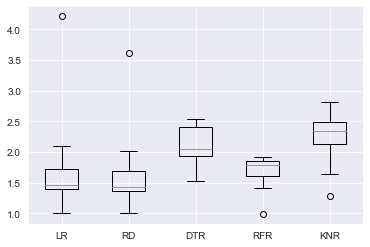

In [37]:
from statistics import mean


models = []
models.append(('LR', LinearRegression()))
models.append(('RD',Ridge(alpha=1.0)))
models.append(('DTR',DecisionTreeRegressor(random_state = 0)))
models.append(('RFR',RandomForestRegressor( n_estimators=20,random_state=0)))
models.append(('KNR',KNeighborsRegressor(n_neighbors=3)))
# evaluate each model in turn
results = []
names = []
kf = KFold(n_splits=10)
for name, model in models:

	for train_index, test_index in kf.split(Y_train.to_numpy()):
		xtr=X_train.iloc[train_index]
		ytr=Y_train.iloc[train_index]
		xte=X_train.iloc[test_index]
		yte=Y_train.iloc[test_index]
		model.fit(xtr,ytr)
		yv=model.predict(xte)
		MSE = np.square(np.subtract(yte,yv)).mean() 
	
		RMSE = math.sqrt(MSE)
		results.append(RMSE)
	names.append(name)
		
r=np.array_split(results, 5)		

for i in range(len(r)):
	print('%s: %f ' % (names[i], r[i].mean()))
plt.boxplot(r, labels=names)

In [38]:
model = LinearRegression()
model.fit(X_train, Y_train)
X_validation=X_validation.reset_index(drop=True)
Y_validation=Y_validation.reset_index(drop=True)
predictions = model.predict(X_validation)

MSE = np.square(np.subtract(Y_validation,predictions)).mean() 
	
RMSE = math.sqrt(MSE)


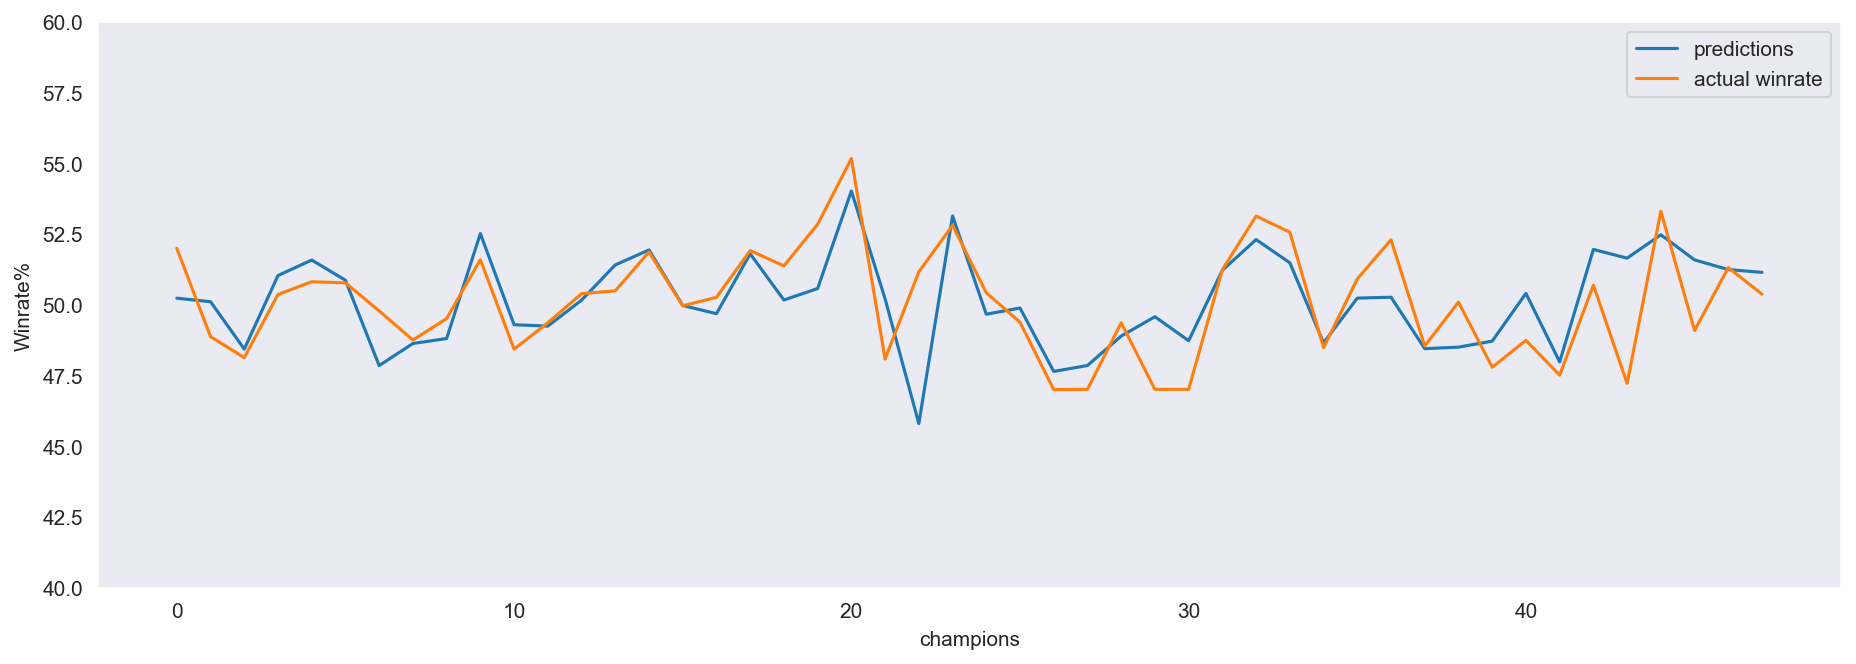

In [39]:
# sns.set_style('darkgrid')
figure(figsize=(15, 5), dpi=150)
plt.plot(X_validation.index,predictions,label='predictions')
plt.plot(X_validation.index,Y_validation,label='actual winrate')
plt.ylim((40,60))
plt.xlabel('champions')
plt.ylabel('Winrate%')
plt.grid()
plt.legend()

